# Pymaceuticals Inc.
---

### Analysis

Review all the figures and tables that you generated in this assignment. Write at least three observations or inferences that can be made from the data. Include these observations at the top of your notebook.
This was a challenging and interesting analysis. It really challenged me in creating the correct dataframes needed to pull the information I needed from them. I had so many data frames by the time I was finished I ended up confusing them. I struggled creating the graphs as well, I'm so used to excel that these graphs have been difficult for me. I chose to use the seaborn code as we used it for our project work with the help of a tutor. I think it looks nice and showed the differences between the medications clearly. I used all of our previous lessons, previous project work, peer support, youtube, chat gpt and stack overflow to help me complete this assignment and solve the many bugs I encountered. I appreciated the starter code very much, it helped outline what I was trying to do.
o	1. The mean of most of the medications were all very similar, including Placebo, so it would be safe to say that they don’t do a wonderful job removing the tumor from the mice. The exception is Ramicane and Capomulin which are a little lower than the rest.
o	2. Ramicane and Capomulin have a low mean which means that the tumor volume seems to be going down. They also have the smallest standard deviation and variance. This tells me that they are the most consistent for the mice.
o	3. There seems to be a correlation between the size of the tumor and the weight of the mouse. Mice weighing more had larger tumor volume on average.


In [242]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import pearsonr, linregress
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata,study_results, on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [181]:
# Checking the number of mice.
mouse_count = combined_df["Mouse ID"].nunique()

#print mouse_count variable
mouse_count

249

In [182]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_df = combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)
only_unique_df = combined_df[duplicated_df]
only_unique_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [183]:
# Optional: Get all the data for the duplicate mouse ID. 
only_unique_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [184]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
minus_combined_df = combined_df[combined_df["Mouse ID"] != "g989"]
minus_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [185]:
# Checking the number of mice in the clean DataFrame.
minus_mouse_count = minus_combined_df["Mouse ID"].nunique()

#print mouse_count variable
minus_mouse_count

248

## Summary Statistics

In [258]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
mean_drug = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().reset_index().set_index("Drug Regimen")
median_drug = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().reset_index().set_index("Drug Regimen")
var_drug = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().reset_index().set_index("Drug Regimen")
std_drug = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().reset_index().set_index("Drug Regimen")
sem_drug = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().reset_index().set_index("Drug Regimen")

            
#Dictionary to make table

# Assemble the resulting series into a single summary DataFrame.

summary_df= pd.concat([mean_drug, median_drug, var_drug, std_drug, sem_drug],axis=1)
summary_df = summary_df.reset_index().set_index("Drug Regimen")
summary_df


,Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [187]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_summary_df = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"]).reset_index().set_index("Drug Regimen")
drug_summary_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

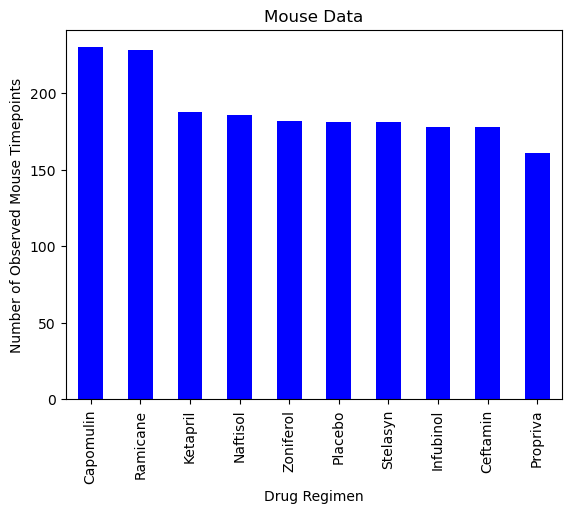

In [188]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_bar = combined_df["Drug Regimen"].value_counts()

#plot the chart
drug_bar.plot(kind="bar", color ="blue")

#labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.title("Mouse Data")

#Print plot
plt.show()

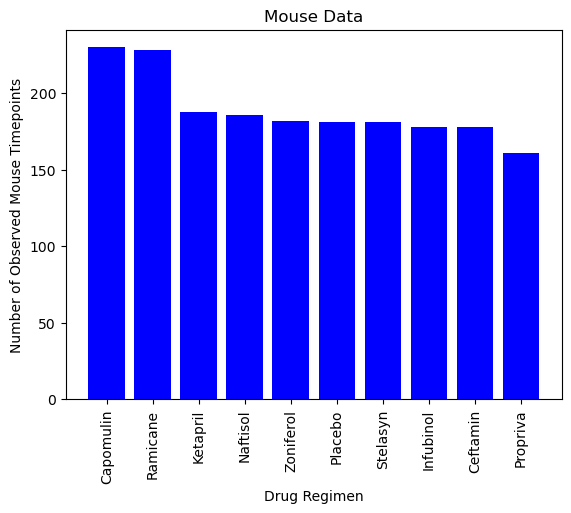

In [189]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_bar = combined_df["Drug Regimen"].value_counts()

#plot the chart with pyplot
plt.bar(drug_bar.index, drug_bar, color="blue")

#labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.title("Mouse Data")

#rotation
plt.xticks(rotation=90)
plt.show()

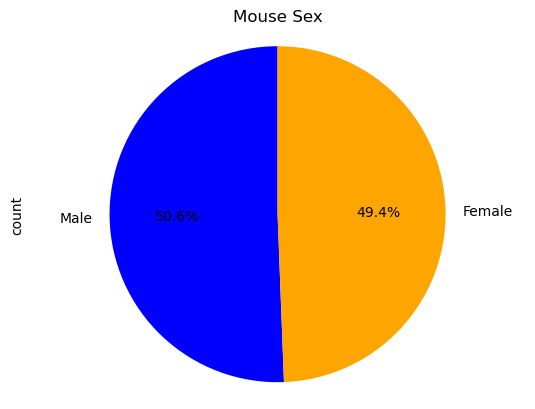

In [190]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#content
Data = {
    "Sex" : ["Male", "Female"]
}
#create plot
sex_pie = combined_df["Sex"].value_counts()
sex_pie.plot(kind="pie",autopct='%1.1f%%', startangle=90, colors=["blue","orange"])

#labels
plt.title("Mouse Sex")

#plot the chart
plt.axis("equal")
plt.show()

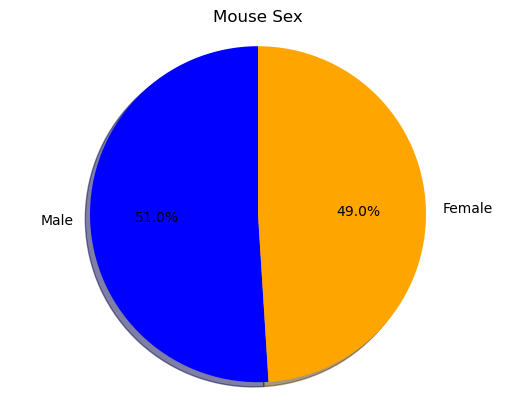

In [191]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_pie = combined_df["Sex"].value_counts()

#content
labels = ["Male", "Female"]
total = [51,49]
colors = ["blue", "orange"]


#labels
plt.title("Mouse Sex")
plt.pie(total, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=90)

#plot the chart
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [192]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#filter by treatment
for treatment in treatments:
    treatment_df = combined_df[(combined_df["Drug Regimen"] == "Capomulin") |
                           (combined_df["Drug Regimen"] == "Ramicane") |
                           (combined_df["Drug Regimen"] == "Infubinol") |
                           (combined_df["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
last_tumor = treatment_df.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_tumor, combined_df[["Mouse ID", "Tumor Volume (mm3)"]], on="Mouse ID", how='left')
merged_df


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,45.000000
1,Capomulin,b128,45,45.651331
2,Capomulin,b128,45,43.270852
3,Capomulin,b128,45,43.784893
4,Capomulin,b128,45,42.731552
...,...,...,...,...
809,Ramicane,z578,45,37.414114
810,Ramicane,z578,45,37.815935
811,Ramicane,z578,45,38.504824
812,Ramicane,z578,45,34.022093


In [193]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merged_df["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile - lower_quartile
    
lower_bound = lower_quartile - (1.5 * iqr)
upper_bound = upper_quartile + (1.5 * iqr)
    
    
    # Determine outliers using upper and lower bounds
outliers = merged_df[(merged_df["Tumor Volume (mm3)"] < lower_bound) | (merged_df["Tumor Volume (mm3)"] > upper_bound)]

outliers

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
156,Capomulin,s185,45,23.343598
278,Ceftamin,k210,45,66.622836
279,Ceftamin,k210,45,68.923185
289,Ceftamin,l471,45,67.748662
366,Ceftamin,w151,45,67.527482
397,Ceftamin,y769,45,68.594745
417,Infubinol,a203,45,67.973419
444,Infubinol,a685,45,66.083066
452,Infubinol,c139,45,67.821420
453,Infubinol,c139,45,69.428141


Text(0, 0.5, 'Tumor Volume (mm3)')

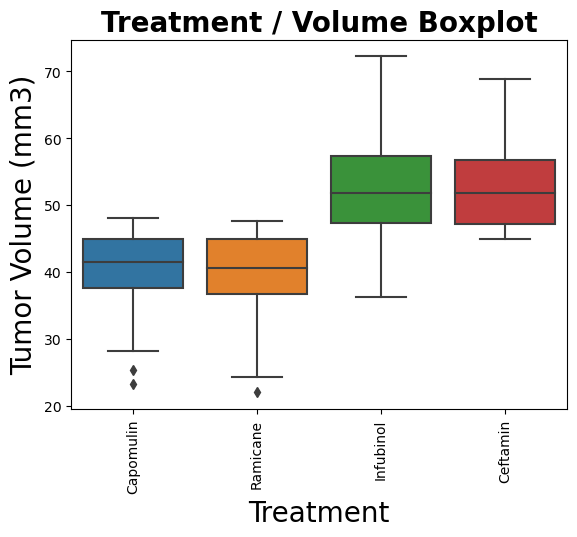

<Figure size 1000x500 with 0 Axes>

In [226]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

ax = sns.boxplot(x="Drug Regimen", y="Tumor Volume (mm3)", data= combined_df, order=treatments)
plt.figure(figsize= (10,5))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Treatment / Volume Boxplot",fontdict= { 'fontsize': 20, 'fontweight':'bold'})

# set x label and y label size and name
ax.set_xlabel("Treatment",fontsize = 20, )
ax.set_ylabel("Tumor Volume (mm3)",fontsize = 20 )


## Line and Scatter Plots

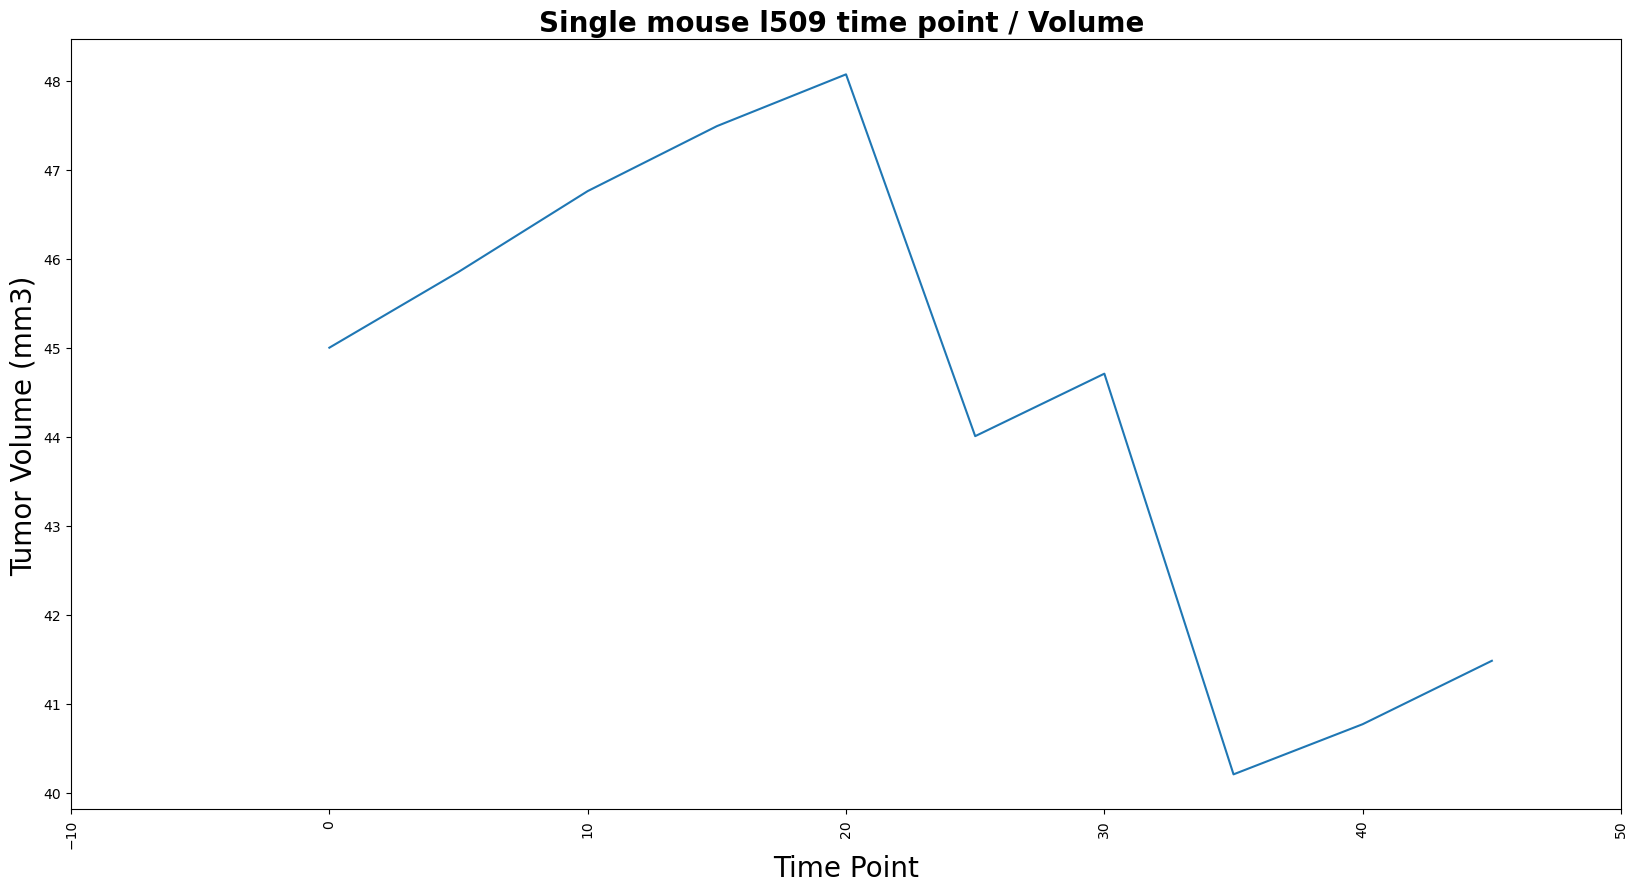

In [227]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df=combined_df[combined_df["Drug Regimen"] == "Capomulin"]

mouse_id= "l509"
plt.figure(figsize= (20,10))

ax = sns.lineplot(x="Timepoint", y="Tumor Volume (mm3)", data= capomulin_df[capomulin_df["Mouse ID"] == mouse_id])
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Single mouse l509 time point / Volume ",fontdict= { 'fontsize': 20, 'fontweight':'bold'})

# set x label and y label size and name
ax.set_xlabel("Time Point",fontsize = 20, )
ax.set_ylabel("Tumor Volume (mm3)",fontsize = 20 )

plt.show()

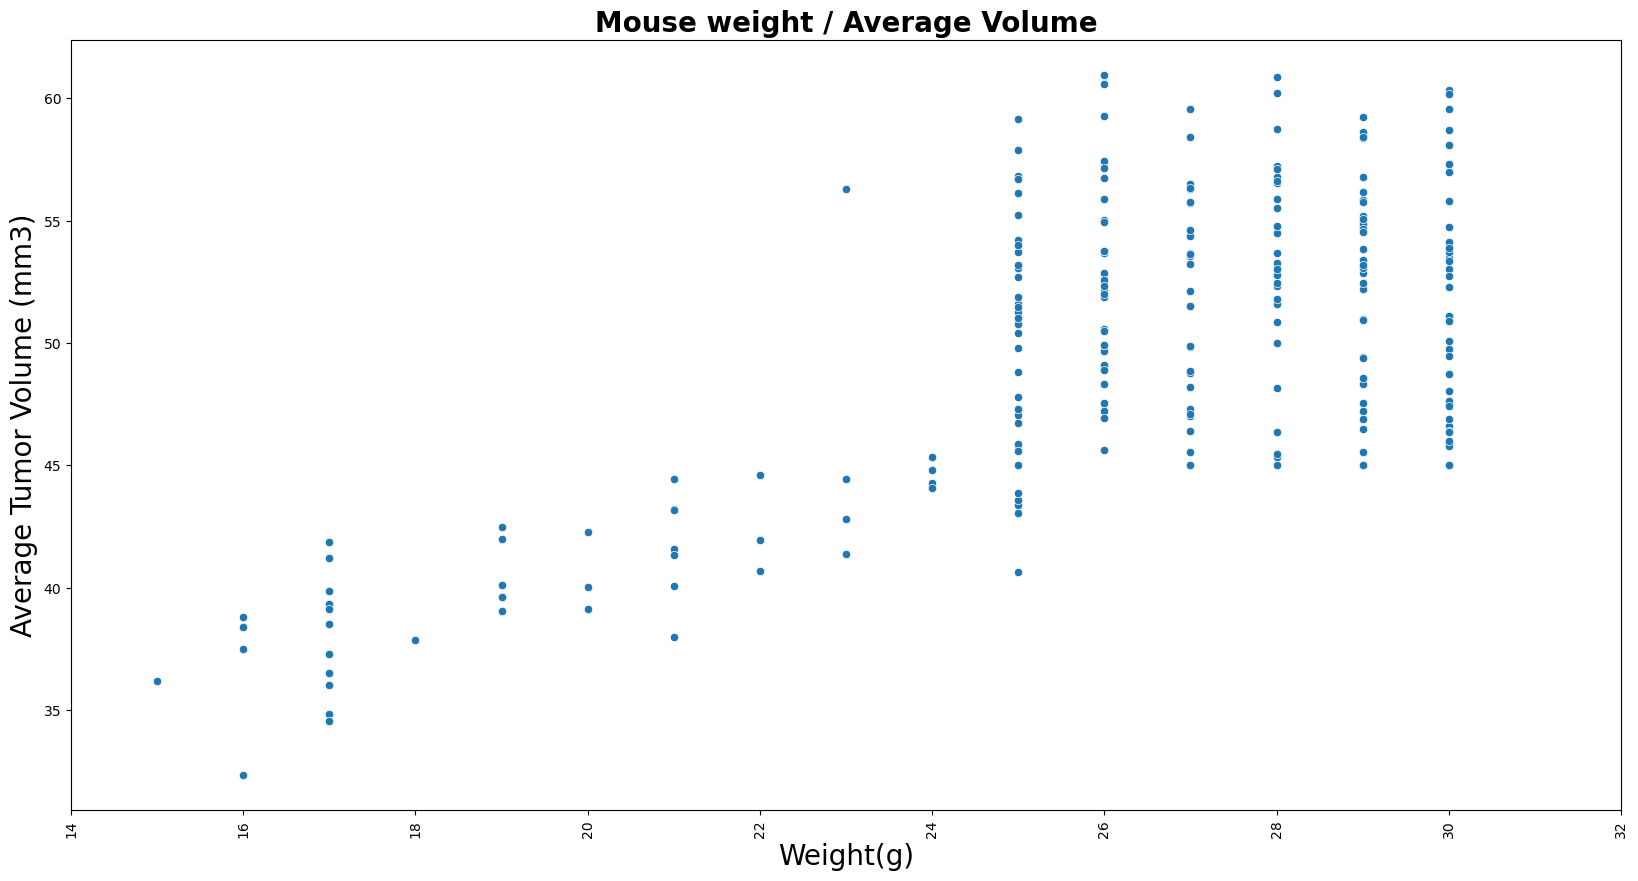

In [238]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#create plot
plt.figure(figsize= (20,10))
#set average of all mice treated with Capomulin
mean_capomulin = combined_df.groupby(["Drug Regimen", "Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()

ax = sns.scatterplot(x="Weight (g)", y="Tumor Volume (mm3)", data=mean_capomulin)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Mouse weight / Average Volume",fontdict= { 'fontsize': 20, 'fontweight':'bold'})

# set x label and y label size and name
ax.set_xlabel("Weight(g)",fontsize = 20, )
ax.set_ylabel("Average Tumor Volume (mm3)",fontsize = 20 )

plt.show()

## Correlation and Regression

correlation coefficient = 0.6592482941546904


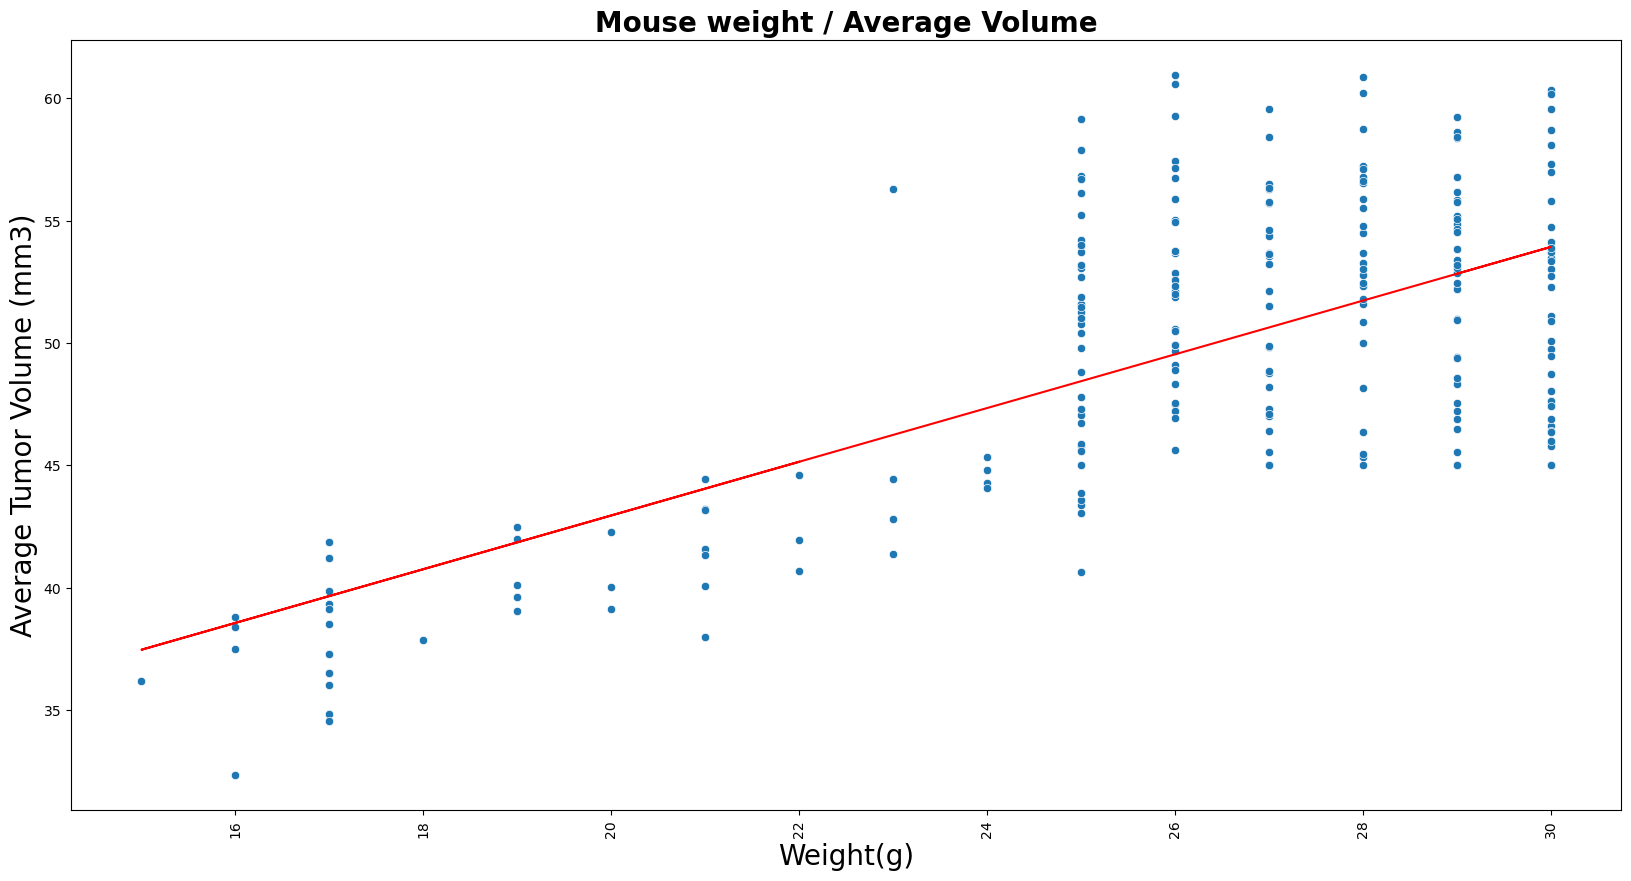

In [256]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#create plot
plt.figure(figsize= (20,10))
#set average of all mice treated with Capomulin
mean_capomulin = combined_df.groupby(["Drug Regimen", "Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()

ax = sns.scatterplot(x="Weight (g)", y="Tumor Volume (mm3)", data=mean_capomulin)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Mouse weight / Average Volume",fontdict= { 'fontsize': 20, 'fontweight':'bold'})

# set x label and y label size and name
ax.set_xlabel("Weight(g)",fontsize = 20, )
ax.set_ylabel("Average Tumor Volume (mm3)",fontsize = 20 )

#Correlation coefficient
correlation_coefficient, _ = pearsonr(mean_capomulin["Weight (g)"], mean_capomulin["Tumor Volume (mm3)"])
print(f"correlation coefficient = {correlation_coefficient}")

#linear regression
slope, intercept, r_value, p_value, std_err = linregress(mean_capomulin["Weight (g)"], mean_capomulin["Tumor Volume (mm3)"])
plt.plot(mean_capomulin["Weight (g)"], slope * mean_capomulin["Weight (g)"] + intercept, color='red')

#Annotate the equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")

plt.show()